# Feature Selection
This Notebook Implements Feature Selection using statistical methods and ML-based techniques.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## 1. Load the cleaned dataset

In [2]:
df = pd.read_csv("../data/cleaned_heart_disease.csv")

X = df.drop("target", axis=1)
y = df["target"]

## 2. Use Feature Importance (Random Forest / XGBoost) to rank variables

### XGBoost

In [3]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X, y)

xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

### Random Forest

In [4]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

### Visualize Feature Importance

C:\Users\PC\AppData\Local\Temp\ipykernel_25360\1957211688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importance.values, y=xgb_importance.index, palette="viridis")


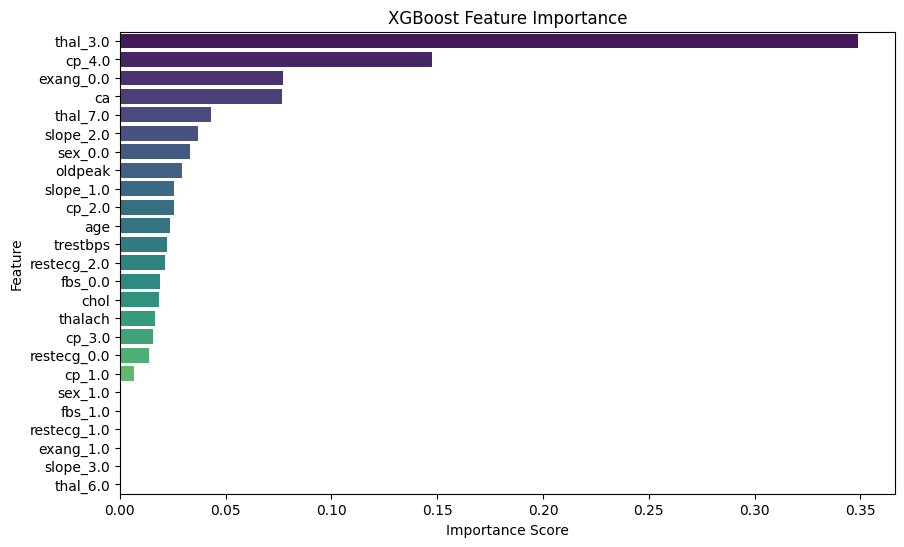

C:\Users\PC\AppData\Local\Temp\ipykernel_25360\1957211688.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importance.values, y=rf_importance.index, palette="viridis")


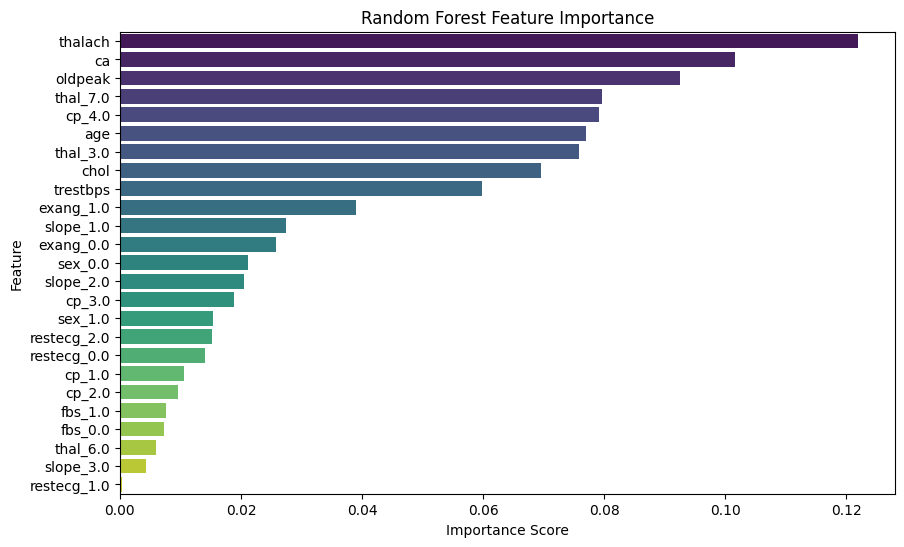

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(x=xgb_importance.values, y=xgb_importance.index, palette="viridis")
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=rf_importance.values, y=rf_importance.index, palette="viridis")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

## 3. Apply Recursive Feature Elimination to select the best predictors

In [6]:
lr = LogisticRegression(random_state=42)
rfe = RFE(lr, n_features_to_select=7)
rfe.fit(X, y)

print("RFE Selected Features:", list(X.columns[rfe.support_]))

RFE Selected Features: ['ca', 'sex_0.0', 'cp_3.0', 'cp_4.0', 'exang_0.0', 'slope_2.0', 'thal_7.0']


## 4. Use Chi-Square Test to check feature significance

C:\Users\PC\AppData\Local\Temp\ipykernel_25360\2784800878.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chi_scores.values, y=chi_scores.index, palette="viridis")


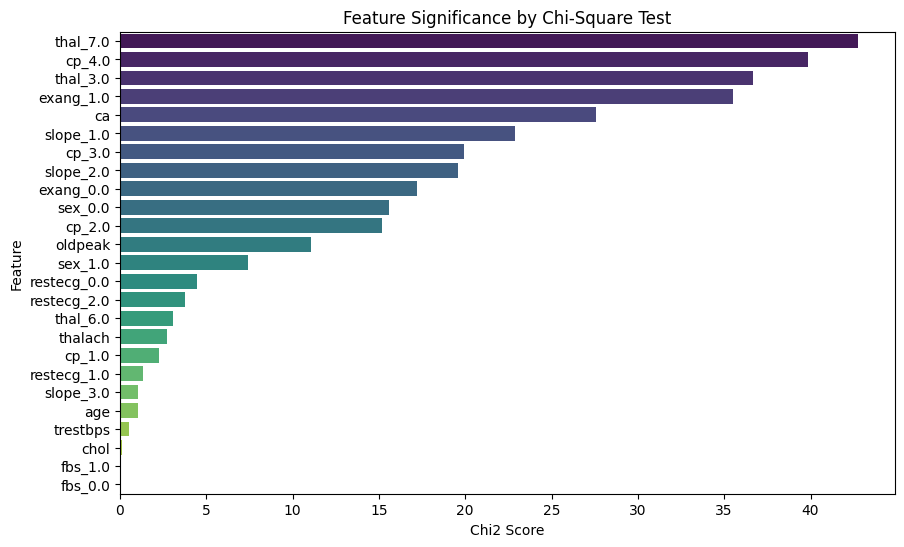

In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi = SelectKBest(score_func=chi2, k=7)
chi.fit(X_scaled, y)

chi_scores = pd.Series(chi.scores_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=chi_scores.values, y=chi_scores.index, palette="viridis")
plt.title("Feature Significance by Chi-Square Test")
plt.xlabel("Chi2 Score")
plt.ylabel("Feature")
plt.show()

## 5. Save the reduced dataset

In [8]:
selected_features = xgb_importance.head(7).index.tolist()
df_selected = df[selected_features + ["target"]]
df_selected.to_csv("../data/selected_feature_heart_disease.csv", index=False)